In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import igrins_mod as ig # Custom module file for igrins shenanigans

import glob
import os
import warnings

import astropy.units as u
# from astropy.modeling import models, fitting
from astroquery.nist import Nist # atomic lines
# from astroquery.linelists.cdms import CDMS # molecular lines?

# from specutils import Spectrum1D
# from specutils.fitting import fit_generic_continuum

from scipy.integrate import trapz, simpson
from scipy.optimize import curve_fit
from scipy.signal import medfilt

# from astropy.io import ascii
from astropy.io import fits


%matplotlib inline

# Plotting Parameters
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] =18

plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20

plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.linewidth'] = 3

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5

plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'

Spextool FITS files contain an array of size ```[nwaves,4,norders*naps]```. 

The ith image (```array[*,*,i]```) contains the data for a single extraction aperture within an order such that

```lambda=array[*,0,i]```

 ```flux=array[*,1,i]```

  ```uncertainty=array[*,2,i]```

  ```flag=array[*,3,i]```.
  
The zeroth image (```array[*,*,0]```) contains the data for the aperture in the order closest to the bottom of the detector that is closest to the bottom of the slit (i.e. also closest to the bottom of the detector).

If no orders have been deselected in the extraction process, the contents of the ith aperture in order j can be found as follows: 

```lambda=array[*,0,{j-min(orders)}*naps + (i-1)]```
  
```flux=array[*,1,{j-min(orders)}*naps + (i-1)]```
   
```uncertainty=array[*,2,{j-min(orders)}*naps + (i-1)]```

```flag=array[*,3,{j-min(orders)}*naps + (i-1)]```

In [2]:
data_path = 'ishell_reduced\\*.fits'
filelist = glob.glob(data_path)
filelist

['ishell_reduced\\hd37887_k2_7.fits',
 'ishell_reduced\\hd37887_k2_8.fits',
 'ishell_reduced\\hd37887_k2_9.fits',
 'ishell_reduced\\hops174_K2_83.fits',
 'ishell_reduced\\hops385_K2_5.fits',
 'ishell_reduced\\hops385_K2_6.fits',
 'ishell_reduced\\hops58_k2_1.fits',
 'ishell_reduced\\hops58_k2_2.fits',
 'ishell_reduced\\hops58_k2_3.fits']

In [3]:
header_list = []
for i in range(len(filelist)):
    header_list.append(fits.getheader(filelist[i]))

    print(f"{header_list[i]['OBJECT']}") # object names

HD37887
HD37887
HD37887
HOPS 174
HOPS 385
HOPS 385
HOPS 58
HOPS 58
HOPS 58


In [8]:
data_list = []
wavelength_list = []
flux_list = []
unc_list = []

# Get the number of orders and apertures
norders = header_list[0]['NORDERS']
naps = header_list[0]['NAPS']

for i in range(len(filelist)):
    with fits.open(filelist[i]) as hdul:
        data = hdul[0].data
        header = hdul[0].header
        for j in range(norders):
            wavelength_list.append(data[:,0,j]) # wavelengths
            flux_list.append(data[:,1,j])       # fluxes
            unc_list.append(data[:,2,j])        # uncertainties

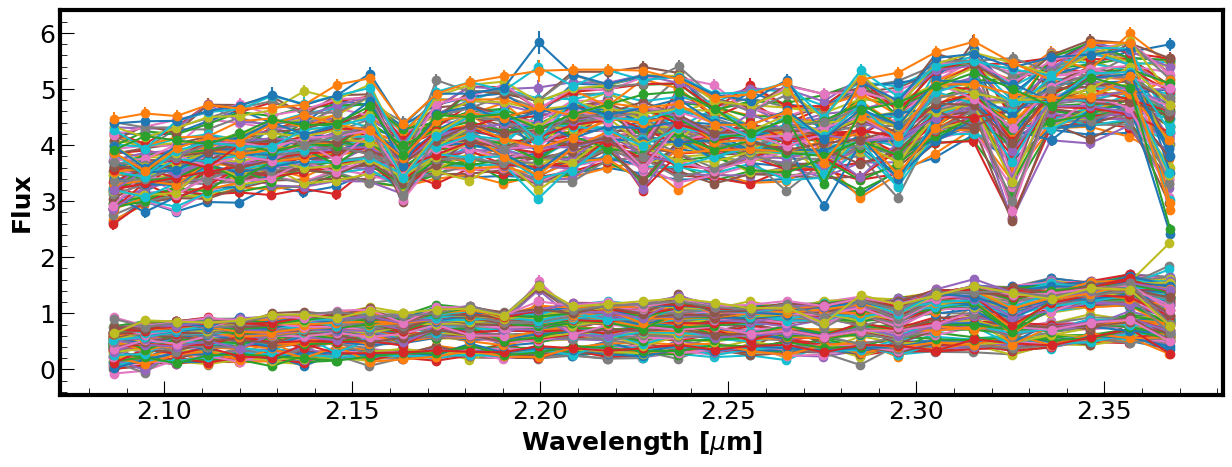

In [17]:
fig = plt.figure(figsize=(15,5))

# for i in range(len(filelist)):
for i in range(len(wavelength_list)):
    plt.errorbar(wavelength_list[i], flux_list[i], unc_list[i], marker='o')
# plt.errorbar(wavelength_list[0], flux_list[0], unc_list[0], marker='o')
# plt.errorbar(wavelength_list[1], flux_list[1], unc_list[1], marker='o')
# plt.errorbar(wavelength_list[2], flux_list[2], unc_list[2], marker='o')

# plt.errorbar(wavelength_list[32], flux_list[32], unc_list[32], marker='o')
# plt.errorbar(wavelength_list[33], flux_list[33], unc_list[33], marker='o')
# plt.errorbar(wavelength_list[34], flux_list[34], unc_list[34], marker='o')

# plt.errorbar(wavelength_list[62], flux_list[62], unc_list[62], marker='o')
# plt.errorbar(wavelength_list[63], flux_list[63], unc_list[63], marker='o')
# plt.errorbar(wavelength_list[64], flux_list[64], unc_list[64], marker='o')

plt.xlabel(r"Wavelength [$\mu$m]")
plt.ylabel('Flux')

plt.show()

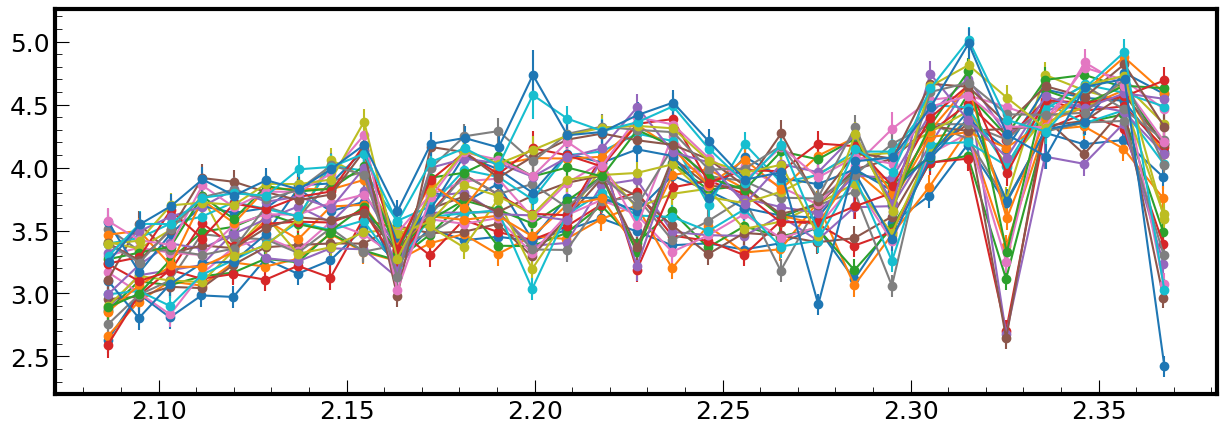

In [10]:
with fits.open(filelist[0]) as hdul:
    data = hdul[0].data
    header = hdul[0].header

# Calculate the minimum and maximum orders
min_order = int(header['ORDERS'].split(',')[0])
max_order = int(header['ORDERS'].split(',')[-1])

# Iterate through each order and aperture to extract wavelength and flux
for i in range(norders * naps):
    order_num = min_order + i // naps

fig = plt.figure(figsize=(15,5))
for i in range(norders * naps):
    plt.errorbar(data[:,0,i], data[:,1,i], data[:,2,i], marker='o')
    # plt.ylim(3,5)
    # plt.xlim(2.236,2.237)
    # plt.title(f'f')
plt.show()